# PHASE 3 PROJECT : H1N1 VACCINE PREDICTION.

# INTRODUCTION.
# BUSINESS PROBLEM.
The Ministry of Health wants to administer Covid-19 vaccines but they do not know how people will respond. The ministry revisited past data with the information of vaccination cases in late 2009 and early 2010 conducted by the United States. I have been given this data and tasked to predict whether people received H1N1 vaccines according to their backgrounds,opinions and health behaviors.

# OBJECTIVES
The main objectives are:
 * To predict how likely individuals are to receive H1N1_vaccine.
 * To use Logistic regression modelling to make our predictions
 * To model a DecisionTree that provides us with predictions
 * To evaluate the performance of our models and come up with the best model.
 * Provide insight of how people would react to covid-19 vaccination.

# Data Understanding
For this project, i will be using information from datasets:
 * `training_set_features.csv`- A dataset containing personal information of individuals who responded to the survey about h1n1_vaccination.
 * `training_set_labels.csv` - A dataset containing the label features 0 and 1. 0 for those who received vaccines and 1 for those who didn't.

# DATA PREPARATION

Here, I take a closer look at the data features and labels.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import make_scorer,log_loss
from sklearn.base import clone

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the two data sets.
features=pd.read_csv("training_set_features.csv")
labels=pd.read_csv("training_set_labels.csv")

In [3]:
# view features of the training dataset
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
features.shape

(26707, 36)

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [6]:
#Checking for any null values
features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [7]:
# Checking for duplicates.
features.duplicated().sum()

0

In [8]:
# Having a look at the training_set_labels
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [9]:
labels.shape

(26707, 3)

In [10]:
# checking for any null values in the labels
labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

In [11]:
#Checking for any duplicate values in the labels
labels.duplicated().sum()

0

##### Here, we delete the responden seasonal_vaccine to remain with h1n1_column as our only target.

In [12]:
labels=labels.iloc[:,:-1]
labels.head()

,respondent_id,h1n1_vaccine
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [13]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   respondent_id  26707 non-null  int64
 1   h1n1_vaccine   26707 non-null  int64
dtypes: int64(2)
memory usage: 417.4 KB


## Data Preprocessing

 Finding the numerical columns with missing values and we fill them with the median values.

In [14]:
# Finding the numerical columns with missing values.
num_missing= [feature for feature in features.columns if features[feature].isna().sum()>1 and features[feature].dtypes!='O']
features[num_missing].isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

In [15]:
## Replacing the numerical Missing Values

for feature in num_missing:
    ## We will replace by using median since there are outliers
    median_value=features[feature].median()
    
    features[feature].fillna(median_value,inplace=True)
    
features[num_missing].isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

Finding the categorical columns with missing values and filling them with "missing".

In [16]:
cat_missing=[feature for feature in features.columns if features[feature].isna().sum()>1 and features[feature].dtypes=='O']
cat_missing

['education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'employment_industry',
 'employment_occupation']

In [17]:
## Replacing the categorical Missing Values

for feature in cat_missing:
    ## We will replace by using median since there are outliers
     features[feature].fillna("missing",inplace=True)
    
features[num_missing].isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

In [18]:
features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

#### Checking for the unique values in the numerical columns from our features dataset

In [19]:
#Checking for the unique values in the numericals columns from our features dataset
print("h1n1_concern")
print(features.h1n1_concern.unique())

print("h1n1_knowledge")
print(features.h1n1_knowledge.unique())

print("behavioral_antiviral_meds")
print(features.behavioral_antiviral_meds.unique())

print("behavioral_avoidance")
print(features.behavioral_avoidance.unique())

print("behavioral_face_mask")
print(features.behavioral_face_mask.unique())

print("behavioral_wash_hands")
print(features.behavioral_wash_hands.unique())

print("behavioral_large_gatherings")
print(features.behavioral_large_gatherings.unique())

print("behavioral_outside_home")
print(features.behavioral_outside_home.unique())

print("behavioral_touch_face")
print(features.behavioral_touch_face.unique())

print("doctor_recc_h1n1")
print(features.doctor_recc_h1n1.unique())

print("doctor_recc_seasonal")
print(features.doctor_recc_seasonal.unique())

print("chronic_med_condition")
print(features.chronic_med_condition.unique())

print("child_under_6_months")
print(features.child_under_6_months.unique())

print("health_worker")
print(features.health_worker.unique())

print("health_insurance")
print(features.health_insurance.unique())

print("opinion_h1n1_vacc_effective")
print(features.opinion_h1n1_vacc_effective.unique())

print("opinion_h1n1_risk")
print(features.opinion_h1n1_risk.unique())

print("opinion_h1n1_sick_from_vacc")
print(features.opinion_h1n1_sick_from_vacc.unique())

print("opinion_seas_vacc_effective")
print(features.opinion_seas_vacc_effective.unique())

print("opinion_seas_risk")
print(features.opinion_seas_risk.unique())

print("opinion_seas_sick_from_vacc")
print(features.opinion_seas_sick_from_vacc.unique())

h1n1_concern
[1. 3. 2. 0.]
h1n1_knowledge
[0. 2. 1.]
behavioral_antiviral_meds
[0. 1.]
behavioral_avoidance
[0. 1.]
behavioral_face_mask
[0. 1.]
behavioral_wash_hands
[0. 1.]
behavioral_large_gatherings
[0. 1.]
behavioral_outside_home
[1. 0.]
behavioral_touch_face
[1. 0.]
doctor_recc_h1n1
[0. 1.]
doctor_recc_seasonal
[0. 1.]
chronic_med_condition
[0. 1.]
child_under_6_months
[0. 1.]
health_worker
[0. 1.]
health_insurance
[1. 0.]
opinion_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
opinion_h1n1_risk
[1. 4. 3. 2. 5.]
opinion_h1n1_sick_from_vacc
[2. 4. 1. 5. 3.]
opinion_seas_vacc_effective
[2. 4. 5. 3. 1.]
opinion_seas_risk
[1. 2. 4. 3. 5.]
opinion_seas_sick_from_vacc
[2. 4. 1. 5. 3.]


#### Checking for the unique values in the numerical columns from our features dataset

In [20]:
# For Datatype = object

print("age_group")
print(features.age_group.unique())

print("education")
print(features.education.unique())

print("race")
print(features.race.unique())

print("income_poverty")
print(features.income_poverty.unique())

print("marital_status")
print(features.marital_status.unique())

print("rent_or_own")
print(features.rent_or_own.unique())

print("employment_status")
print(features.employment_status.unique())

print("hhs_geo_region")
print(features.hhs_geo_region.unique())

print("census_msa")
print(features.census_msa.unique())

print("employment_industry")
print(features.employment_industry.unique())

print("employment_occupation")
print(features.employment_occupation.unique())

age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'missing']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_poverty
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'missing']
marital_status
['Not Married' 'Married' 'missing']
rent_or_own
['Own' 'Rent' 'missing']
employment_status
['Not in Labor Force' 'Employed' 'Unemployed' 'missing']
hhs_geo_region
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry
['missing' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation
['missing' 'xgwztkwe' 'xtkaffoo' 'emcorrxb'

## Building a Baseline Logistic Regression Model.

Having a look at our labels.

In [21]:
# Having a look at our labels.
print("Raw Counts")
print(labels["h1n1_vaccine"].value_counts())
print()
print("Percentages")
print(labels["h1n1_vaccine"].value_counts(normalize=True))

Raw Counts
h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Percentages
h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64


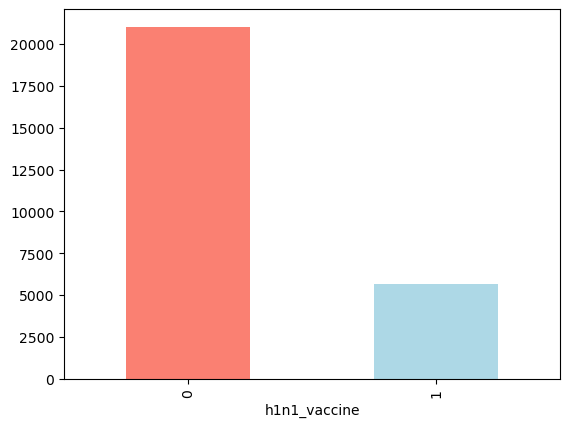

In [22]:
# Plot the value counts with a bar graph
labels.h1n1_vaccine.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

##### This is an imbalanced model where more people did not receive h1n1 vaccines.

#### Define our X and y .

In [23]:
X_org=features.drop("respondent_id",axis=1).copy()
X=pd.get_dummies(X_org,columns=["age_group","education","race","sex","income_poverty","marital_status","rent_or_own",
                "employment_status","hhs_geo_region","census_msa","employment_industry","employment_occupation"],drop_first=True,dtype=int)
y=labels.drop("respondent_id",axis=1).copy()

### Split our dataset into training and test sets

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42,stratify=y)

### My Baseline Model

In [25]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.821601286244311


#### Visualizing the Area Under Curve

AUC: 0.821601286244311


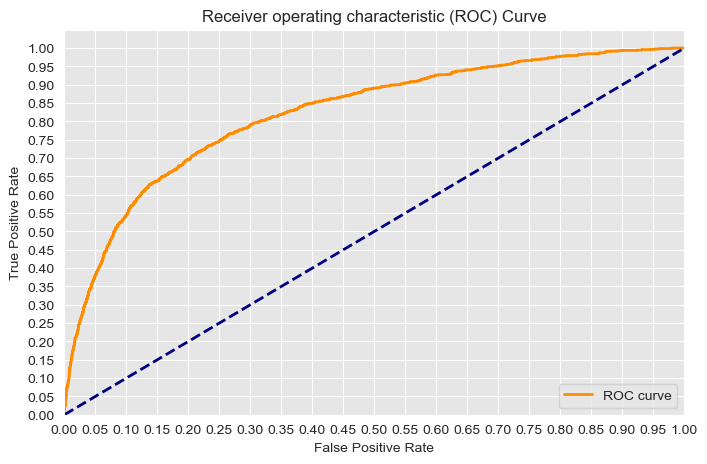

In [26]:
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(8,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Making predictions on the test set using baseline model

In [27]:
# making predictions on the test set using our baseline model
pred = logreg.predict(X_test)

#### Visualizing a confusion matrix

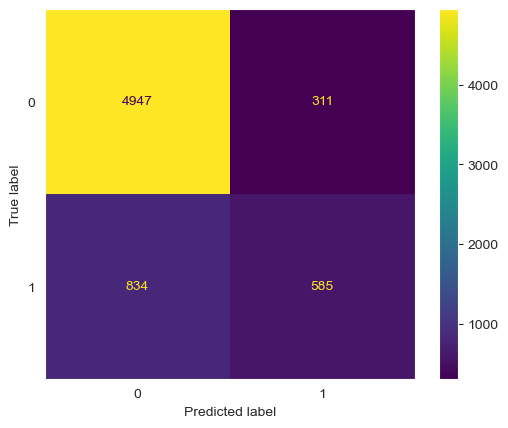

In [28]:
# Plot confusion matrix of the test set
cm = confusion_matrix(y_test, pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

## Tuning Our Baseline Model

### Finding the best C parameter.

LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.7478459616287245
-------------------------------------------------------
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
AUC for 0.01: 0.7974744213388316
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8144042260781316
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.821601286244311
-------------------------------------------------------
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
AUC for 10: 0.8226420172248013
-------------------------------------------------------
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
AUC for 100: 0.8227424045402408
-------------------------------------------------------


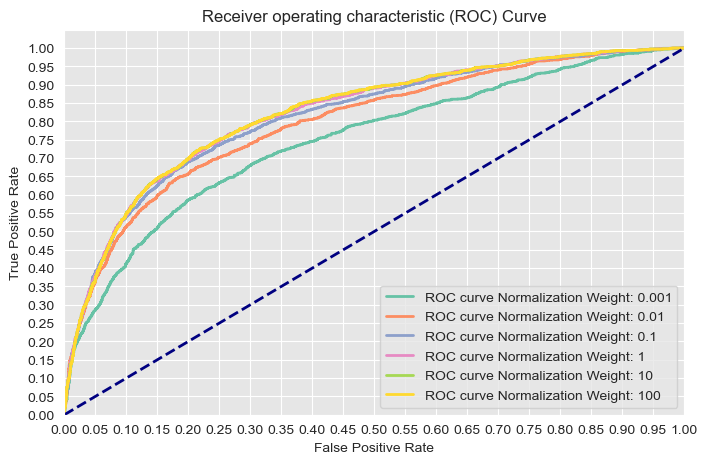

In [29]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set2')

plt.figure(figsize=(8, 5))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* It appears that our best c parameter is 100 since it provides us with the largest AUC.

## Using SMOTE 

This will improve the model performance on the minority class since ours is an imbalance case ma8odelling.

In [30]:
# Previous original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(y_train_resampled.value_counts()) 

h1n1_vaccine
0               15775
1                4255
Name: count, dtype: int64


h1n1_vaccine
0               15775
1               15775
Name: count, dtype: int64


LogisticRegression(C=0.005, fit_intercept=False, solver='liblinear')
AUC for 0.005: 0.7972800800739621
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8023163334317102
-------------------------------------------------------
LogisticRegression(C=0.2, fit_intercept=False, solver='liblinear')
AUC for 0.2: 0.8026708387045238
-------------------------------------------------------
LogisticRegression(C=0.5, fit_intercept=False, solver='liblinear')
AUC for 0.5: 0.8029418442476728
-------------------------------------------------------
LogisticRegression(C=0.8, fit_intercept=False, solver='liblinear')
AUC for 0.8: 0.8029701242524228
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.8029764235899736
-------------------------------------------------------
LogisticRegression(C=1.25, fit_intercept=False, solver='liblinear')
AU

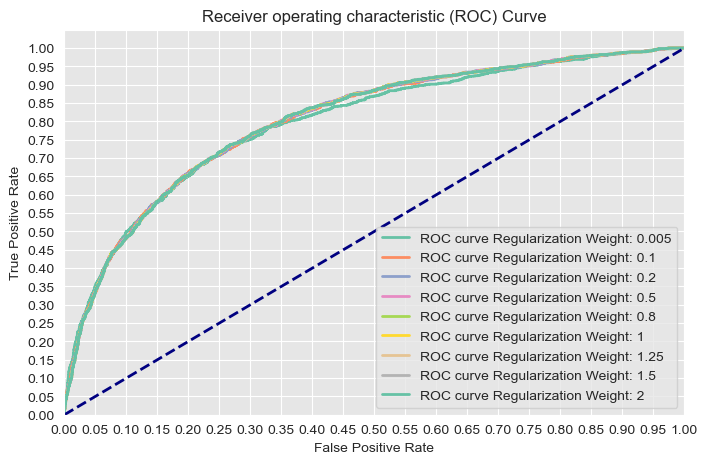

In [31]:
# Now let's compare a few different regularization performances on the dataset
C_param_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names =[0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set2', n_colors=len(names))

plt.figure(figsize=(8, 5))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* SMOTE didn't improve the model, instead the AUC dropped.

## Adding intercept to our model

* We add an intercept to see if the model will improve

In [32]:
# Create new model
logregi = LogisticRegression(fit_intercept=True, C=100, solver='liblinear')
logregi.fit(X_train, y_train)

LogisticRegression(C=100, solver='liblinear')

In [33]:
y2_hat_train = logregi.predict(X_train)
y2_hat_test = logregi.predict(X_test)

In [34]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

#### PLotting the AUC curve to make a comparison

Custom Model Test AUC: 0.7020966205796408
Custome Model Train AUC: 0.713214918218708
Scikit-learn Model 1 Test AUC: 0.8029663714555838
Scikit-learn Model 1 Train AUC: 0.8063414981163206
Scikit-learn Model 2 with intercept Test AUC: 0.8298397475332732
Scikit-learn Model 2 with intercept Train AUC: 0.8405965797672543


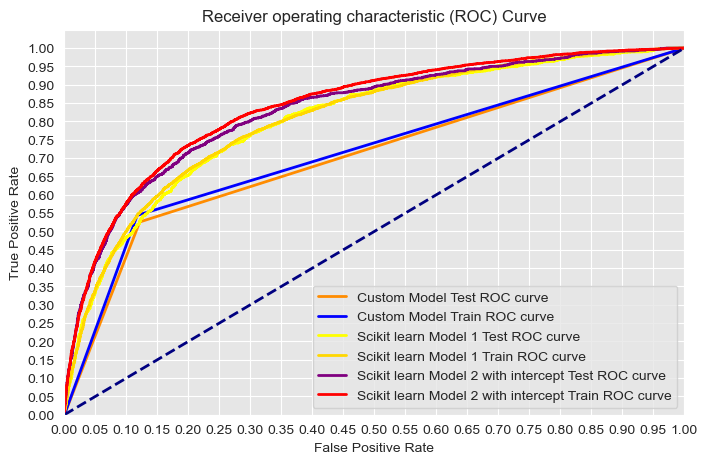

In [35]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(8,5))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* From above, our model improve when we add an intercept to it.

In [36]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y2_hat_train))
print('Testing Precision: ', precision_score(y_test, y2_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y2_hat_train))
print('Testing Recall: ', recall_score(y_test, y2_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y2_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y2_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y2_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y2_hat_test))

Training Precision:  0.6891638545181852
Testing Precision:  0.6732456140350878



Training Recall:  0.43196239717978846
Testing Recall:  0.43269908386187456



Training Accuracy:  0.8379430853719421
Testing Accuracy:  0.8348060506215366



Training F1-Score:  0.5310603871713377
Testing F1-Score:  0.5268125268125268


## Finding the best class weight

We find the best weight parameter below

LogisticRegression(C=100, solver='liblinear')
AUC for None: 0.8298397475332732
-------------------------------------------------------------------------------------
LogisticRegression(C=100, class_weight='balanced', solver='liblinear')
AUC for Balanced: 0.8301951910052967
-------------------------------------------------------------------------------------
LogisticRegression(C=100, class_weight={0: 1, 1: 2}, solver='liblinear')
AUC for 2 to 1: 0.8301898298669552
-------------------------------------------------------------------------------------
LogisticRegression(C=100, class_weight={0: 1, 1: 10}, solver='liblinear')
AUC for 10 to 1: 0.8294966346794348
-------------------------------------------------------------------------------------
LogisticRegression(C=100, class_weight={0: 1, 1: 100}, solver='liblinear')
AUC for 100 to 1: 0.825802542305413
-------------------------------------------------------------------------------------
LogisticRegression(C=100, class_weight={0: 1, 1: 1000}

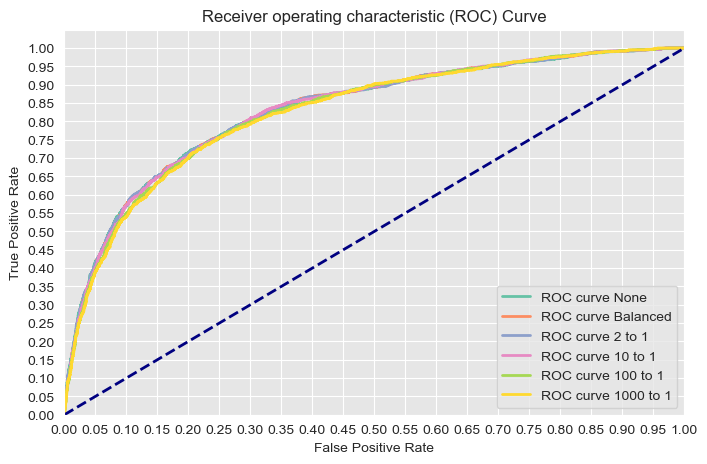

In [37]:
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(8,5))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=100, class_weight=weight, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    print(model_log)

    # Predict
    y3_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* The best calss weight is the balanced one.

## Final Linear Regression Model

After Tuning our model we can fit it using the following best parameters:
 * c=100
 * fit_intercept = True
 * class_weight = balanced
 * solver = liblinear

#### Splitting our X and y into training and Test splits

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=42,stratify=y)

#### Fitting our regression model

In [39]:
# Create new model
logregi = LogisticRegression(fit_intercept=True, C=100, solver='liblinear')
logregi.fit(X_train, y_train)

LogisticRegression(C=100, solver='liblinear')

In [40]:
y2_hat_train = logregi.predict(X_train)
y2_hat_test = logregi.predict(X_test)

In [41]:
# Probability scores for test set
y_score = logregi.fit(X_train, y_train).decision_function(X_test)


In [42]:
# Our Model train and test AUC
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))



Scikit-learn Model 2 with intercept Test AUC: 0.8298397475332732
Scikit-learn Model 2 with intercept Train AUC: 0.8405965797672543


#### Visualizing AUC curve.m

AUC: 0.8236735002416535


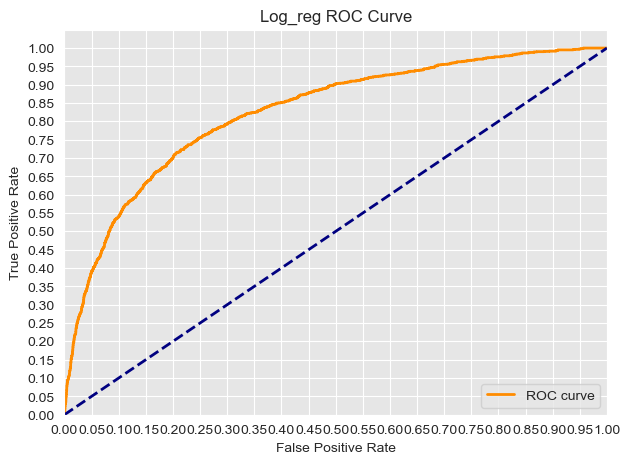

In [43]:
# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(7,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_reg ROC Curve')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("/Users/User/Documents/ROC_conf.png",dpi=100)

In [44]:
print('Training Precision: ', precision_score(y_train, y2_hat_train))
print('Testing Precision: ', precision_score(y_test, y2_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y2_hat_train))
print('Testing Recall: ', recall_score(y_test, y2_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y2_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y2_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y2_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y2_hat_test))

Training Precision:  0.6891638545181852
Testing Precision:  0.6732456140350878



Training Recall:  0.43196239717978846
Testing Recall:  0.43269908386187456



Training Accuracy:  0.8379430853719421
Testing Accuracy:  0.8348060506215366



Training F1-Score:  0.5310603871713377
Testing F1-Score:  0.5268125268125268


In [45]:
# Pred
pred2 = logregi.predict(X_test)

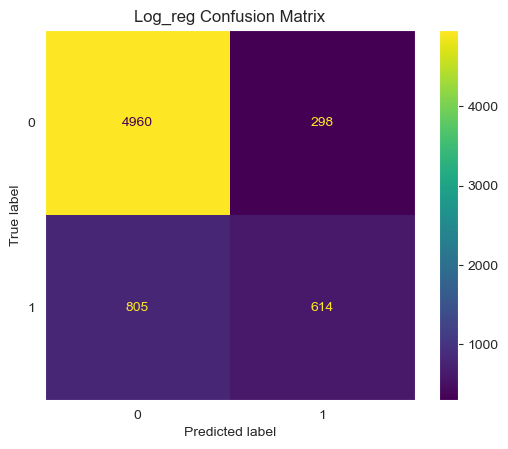

In [46]:
# Plot confusion matrix of the test set
cm_fin = confusion_matrix(y_test, pred2, labels=logregi.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_fin, display_labels=logregi.classes_)
disp.plot()
plt.grid(False) # removes the annoying grid lines from plot
plt.title("Log_reg Confusion Matrix")
plt.show()
#plt.savefig("/Users/User/Documents/LR_conf.png")

## Building A Decision Tree Model for our data.

### Build And evaluate a baseline model

In [47]:
# Splitting the data into training and test sets.
X=X
y=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [48]:
# Train the classifier using training data 
dt = DecisionTreeClassifier(criterion='entropy', random_state=22)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=22)

In [49]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6494733114679381

## Tuning The decision Tree

#### Finding the optimal depths for our decision tree

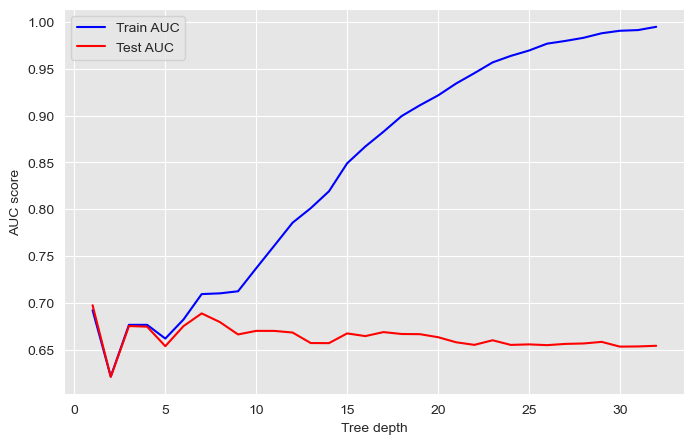

In [50]:
# Identify the optimal tree depth for given data
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=22)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(8,5))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

* From thhe above graph, here, train and test errors rise rapidly between the depths of 2 and 3.
* There is a clear sign of overfitting because training error decreases with increse in depth.

#### Finding the optimal minimum sample splits for the modelm

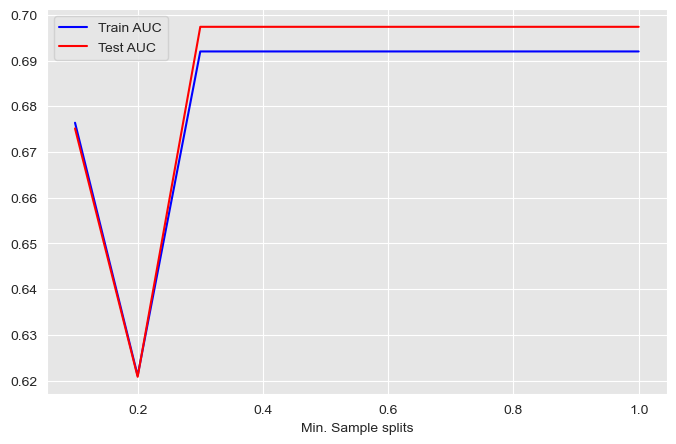

In [51]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=22)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(8,5))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

* AUC for both train and test data stabilizes at around 0.3 minimum sample splits.


#### Finding the optimal minimum sample leafs for the model

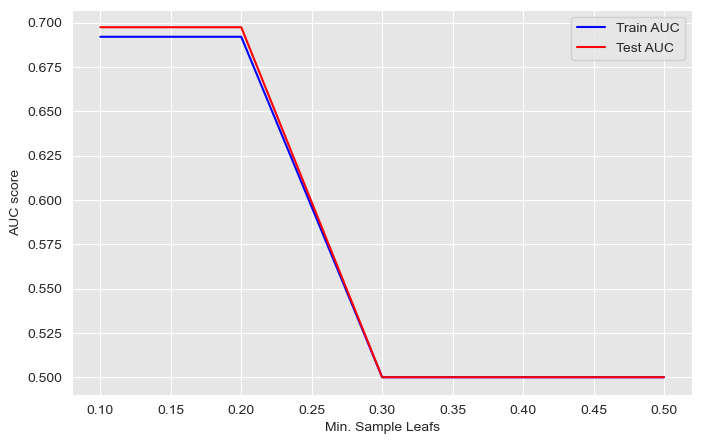

In [52]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=22)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(8,5))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

* AUC gives the best values betwee 0.1 and 0.2 for both train and test sets

#### Finding The optimal maximum feature size

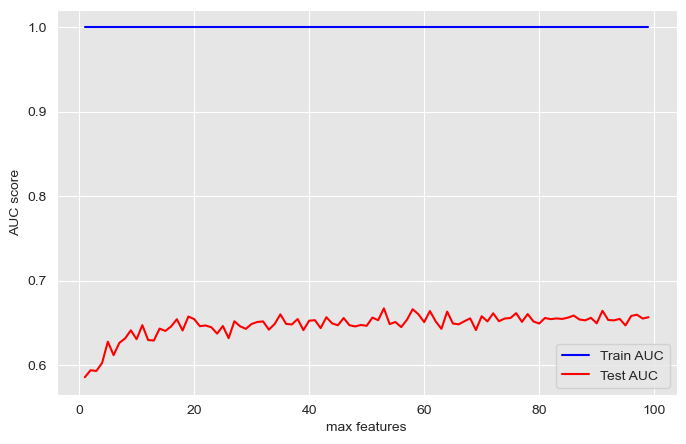

In [53]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=22)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(8,5))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

* Maximum feature size is seen at around 55.

## Final Decision Tree with Optimal Values

In [54]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=55,
                           max_depth=2,
                           min_samples_split=0.25,
                           min_samples_leaf=0.20, 
                           random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6973696589249474

In [55]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))


Accuracy is :80.21964307999501


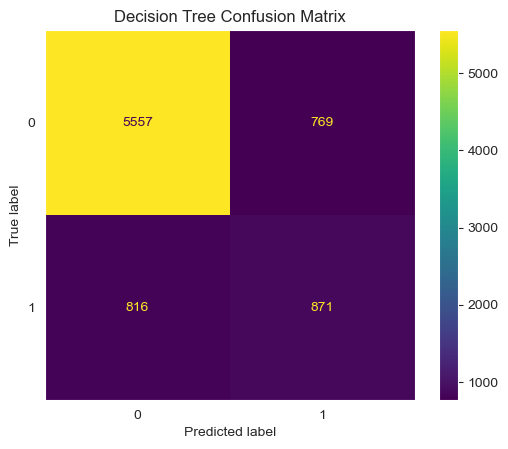

In [56]:
# Alternative confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dt.classes_)
disp.plot()
plt.title("Decision Tree Confusion Matrix")
plt.grid(False)
plt.show()
#plt.savefig("/Users/User/Documents/DT_conf.png")

AUC: 0.6973696589249474


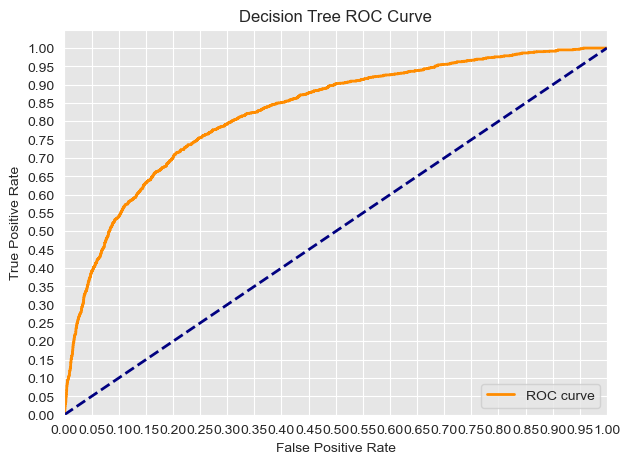

In [57]:
# Print AUC
print('AUC: {}'.format(auc(false_positive_rate, true_positive_rate)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot the ROC curve
plt.figure(figsize=(7, 5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()
#plt.savefig("/Users/User/Documents/DT_ROC.png")


## CONCLUSIONS

From the modelling process, I made two models: `logistic regression` and a `decission tree classification` model.
****I Made the following conclusions:****
 * After evaluating and tuning the logistic regression , It had a ROC AUC score of around **83%**.
 * The logistic regression model also provided a testing accuracy score of **83%** and a testing precission of **67%**.
 * The logistic regression has a higher precission than recall.

 * After evaluating and tuning the decission tree classifier, it had an ROC AUC of around **80%**
 * The Decission Tree classifier had an accuracy of about **70%**

# LIMITATIONS .
The major limitation about this model is that the dataset as imbalanced . Tried using SMOTE but it could help improve the results.

# Recommendations
Of the two models, it is better to utilize the ****regression model****. The regression model has a higher accuracy score of **83%** and a precission of **67%**. 
* This precission is way better than recall.THis is useful in our prediction cases. It is better to predict a person a person as having taken the vaccine than predicting a person that didn't take the vaccine as having taken the vaccine.
* This model can be used in places where one wants to introduce vaccines for the first time.
*  or where a stakeholder wants to begin distributing vaccines due to an emerged virus.